# Kaggle Project #1 - Bike Sharing Demand

In [200]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [201]:
test_df = pd.read_csv("C://Users/qual9/igps/test.csv",parse_dates=["datetime"])
train_df = pd.read_csv("C://Users/qual9/igps/train.csv",parse_dates=["datetime"])

In [202]:
test_df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014
...,...,...,...,...,...,...,...,...,...
6488,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014
6489,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014
6490,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014
6491,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981


In [203]:
train_df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [204]:
all_df = pd.concat((train_df, test_df),axis=0).reset_index()
all_df.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,index,atemp,casual,count,datetime,holiday,humidity,registered,season,temp,weather,windspeed,workingday
0,0,14.395,3.0,16.0,2011-01-01 00:00:00,0,81,13.0,1,9.84,1,0.0,0
1,1,13.635,8.0,40.0,2011-01-01 01:00:00,0,80,32.0,1,9.02,1,0.0,0
2,2,13.635,5.0,32.0,2011-01-01 02:00:00,0,80,27.0,1,9.02,1,0.0,0
3,3,14.395,3.0,13.0,2011-01-01 03:00:00,0,75,10.0,1,9.84,1,0.0,0
4,4,14.395,0.0,1.0,2011-01-01 04:00:00,0,75,1.0,1,9.84,1,0.0,0


In [205]:
all_df.tail()

,index,atemp,casual,count,datetime,holiday,humidity,registered,season,temp,weather,windspeed,workingday
17374,6488,12.880,NaN,NaN,2012-12-31 19:00:00,0,60,NaN,1,10.66,2,11.0014,1
17375,6489,12.880,NaN,NaN,2012-12-31 20:00:00,0,60,NaN,1,10.66,2,11.0014,1
17376,6490,12.880,NaN,NaN,2012-12-31 21:00:00,0,60,NaN,1,10.66,1,11.0014,1
17377,6491,13.635,NaN,NaN,2012-12-31 22:00:00,0,56,NaN,1,10.66,1,8.9981,1
17378,6492,13.635,NaN,NaN,2012-12-31 23:00:00,0,65,NaN,1,10.66,1,8.9981,1


In [206]:
train_index = list(range(len(train_df)))
test_index = list(range(len(train_df),len(all_df)))

In [207]:
train_index

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [208]:
test_index

[10886,
 10887,
 10888,
 10889,
 10890,
 10891,
 10892,
 10893,
 10894,
 10895,
 10896,
 10897,
 10898,
 10899,
 10900,
 10901,
 10902,
 10903,
 10904,
 10905,
 10906,
 10907,
 10908,
 10909,
 10910,
 10911,
 10912,
 10913,
 10914,
 10915,
 10916,
 10917,
 10918,
 10919,
 10920,
 10921,
 10922,
 10923,
 10924,
 10925,
 10926,
 10927,
 10928,
 10929,
 10930,
 10931,
 10932,
 10933,
 10934,
 10935,
 10936,
 10937,
 10938,
 10939,
 10940,
 10941,
 10942,
 10943,
 10944,
 10945,
 10946,
 10947,
 10948,
 10949,
 10950,
 10951,
 10952,
 10953,
 10954,
 10955,
 10956,
 10957,
 10958,
 10959,
 10960,
 10961,
 10962,
 10963,
 10964,
 10965,
 10966,
 10967,
 10968,
 10969,
 10970,
 10971,
 10972,
 10973,
 10974,
 10975,
 10976,
 10977,
 10978,
 10979,
 10980,
 10981,
 10982,
 10983,
 10984,
 10985,
 10986,
 10987,
 10988,
 10989,
 10990,
 10991,
 10992,
 10993,
 10994,
 10995,
 10996,
 10997,
 10998,
 10999,
 11000,
 11001,
 11002,
 11003,
 11004,
 11005,
 11006,
 11007,
 11008,
 11009,
 11010,


In [209]:
all_df.isnull().sum()

index            0
atemp            0
casual        6493
count         6493
datetime         0
holiday          0
humidity         0
registered    6493
season           0
temp             0
weather          0
windspeed        0
workingday       0
dtype: int64

### Evaluation metrics

In [210]:
x = np.array([np.inf,-np.inf,np.nan,-128,128])
np.nan_to_num(x)

array([ 1.79769313e+308, -1.79769313e+308,  0.00000000e+000,
       -1.28000000e+002,  1.28000000e+002])

In [211]:
def rmsle(y,y_):
    log1 = np.nan_to_num(np.log(y+1))
    log2 = np.nan_to_num(np.log(y_+1))
    calc = (log1-log2) ** 2
    return np.sqrt(np.mean(calc))

In [212]:
submission_df = pd.read_csv("C://Users/qual9/igps/sampleSubmission.csv")
submission_df.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [213]:
rmsle(submission_df["count"].values, np.random.randint(0,100,size = len(submission_df)))

3.7542456394696724

In [214]:
del all_df["casual"]
del all_df["registered"]
del all_df["index"]

In [215]:
all_df.head()

,atemp,count,datetime,holiday,humidity,season,temp,weather,windspeed,workingday
0,14.395,16.0,2011-01-01 00:00:00,0,81,1,9.84,1,0.0,0
1,13.635,40.0,2011-01-01 01:00:00,0,80,1,9.02,1,0.0,0
2,13.635,32.0,2011-01-01 02:00:00,0,80,1,9.02,1,0.0,0
3,14.395,13.0,2011-01-01 03:00:00,0,75,1,9.84,1,0.0,0
4,14.395,1.0,2011-01-01 04:00:00,0,75,1,9.84,1,0.0,0


In [216]:
pre_df = all_df.merge(pd.get_dummies(all_df["season"],prefix="season"),left_index = True, right_index=True)
pre_df.head()

,atemp,count,datetime,holiday,humidity,season,temp,weather,windspeed,workingday,season_1,season_2,season_3,season_4
0,14.395,16.0,2011-01-01 00:00:00,0,81,1,9.84,1,0.0,0,1,0,0,0
1,13.635,40.0,2011-01-01 01:00:00,0,80,1,9.02,1,0.0,0,1,0,0,0
2,13.635,32.0,2011-01-01 02:00:00,0,80,1,9.02,1,0.0,0,1,0,0,0
3,14.395,13.0,2011-01-01 03:00:00,0,75,1,9.84,1,0.0,0,1,0,0,0
4,14.395,1.0,2011-01-01 04:00:00,0,75,1,9.84,1,0.0,0,1,0,0,0


In [217]:
pre_df = pre_df.merge(pd.get_dummies(all_df["weather"],prefix="weather"),left_index=True, right_index = True)
pre_df.head()

,atemp,count,datetime,holiday,humidity,season,temp,weather,windspeed,workingday,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
0,14.395,16.0,2011-01-01 00:00:00,0,81,1,9.84,1,0.0,0,1,0,0,0,1,0,0,0
1,13.635,40.0,2011-01-01 01:00:00,0,80,1,9.02,1,0.0,0,1,0,0,0,1,0,0,0
2,13.635,32.0,2011-01-01 02:00:00,0,80,1,9.02,1,0.0,0,1,0,0,0,1,0,0,0
3,14.395,13.0,2011-01-01 03:00:00,0,75,1,9.84,1,0.0,0,1,0,0,0,1,0,0,0
4,14.395,1.0,2011-01-01 04:00:00,0,75,1,9.84,1,0.0,0,1,0,0,0,1,0,0,0


In [218]:
pre_df["datetime"].unique()

array(['2011-01-01T00:00:00.000000000', '2011-01-01T01:00:00.000000000',
       '2011-01-01T02:00:00.000000000', ...,
       '2012-12-31T21:00:00.000000000', '2012-12-31T22:00:00.000000000',
       '2012-12-31T23:00:00.000000000'], dtype='datetime64[ns]')

In [219]:
pre_df["year"] = pre_df["datetime"].dt.year
pre_df["month"] = pre_df["datetime"].dt.month
pre_df["day"] = pre_df["datetime"].dt.day
pre_df["hour"] = pre_df["datetime"].dt.hour
pre_df["weekday"] = pre_df["datetime"].dt.weekday

In [220]:
pre_df = pre_df.merge(pd.get_dummies(pre_df["weekday"],prefix="weekday"),left_index=True, right_index=True)
pre_df.head()

,atemp,count,datetime,holiday,humidity,season,temp,weather,windspeed,workingday,...,day,hour,weekday,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,14.395,16.0,2011-01-01 00:00:00,0,81,1,9.84,1,0.0,0,...,1,0,5,0,0,0,0,0,1,0
1,13.635,40.0,2011-01-01 01:00:00,0,80,1,9.02,1,0.0,0,...,1,1,5,0,0,0,0,0,1,0
2,13.635,32.0,2011-01-01 02:00:00,0,80,1,9.02,1,0.0,0,...,1,2,5,0,0,0,0,0,1,0
3,14.395,13.0,2011-01-01 03:00:00,0,75,1,9.84,1,0.0,0,...,1,3,5,0,0,0,0,0,1,0
4,14.395,1.0,2011-01-01 04:00:00,0,75,1,9.84,1,0.0,0,...,1,4,5,0,0,0,0,0,1,0


In [221]:
pre_df.dtypes

atemp                float64
count                float64
datetime      datetime64[ns]
holiday                int64
humidity               int64
season                 int64
temp                 float64
weather                int64
windspeed            float64
workingday             int64
season_1               uint8
season_2               uint8
season_3               uint8
season_4               uint8
weather_1              uint8
weather_2              uint8
weather_3              uint8
weather_4              uint8
year                   int64
month                  int64
day                    int64
hour                   int64
weekday                int64
weekday_0              uint8
weekday_1              uint8
weekday_2              uint8
weekday_3              uint8
weekday_4              uint8
weekday_5              uint8
weekday_6              uint8
dtype: object

In [222]:
category_variable_list = ["season","weather","workingday","season_1","season_2","season_3","season_4","weather_1","weather_2","weather_3","weather_4","year","month","day","hour","weekday","weekday_0","weekday_1","weekday_2","weekday_3","weekday_4","weekday_5","weekday_6"]
for var_name in category_variable_list:
    pre_df[var_name] = pre_df[var_name].astype("category")

In [223]:
pre_df.dtypes

atemp                float64
count                float64
datetime      datetime64[ns]
holiday                int64
humidity               int64
season              category
temp                 float64
weather             category
windspeed            float64
workingday          category
season_1            category
season_2            category
season_3            category
season_4            category
weather_1           category
weather_2           category
weather_3           category
weather_4           category
year                category
month               category
day                 category
hour                category
weekday             category
weekday_0           category
weekday_1           category
weekday_2           category
weekday_3           category
weekday_4           category
weekday_5           category
weekday_6           category
dtype: object

In [224]:
train_df = pre_df.iloc[train_index]

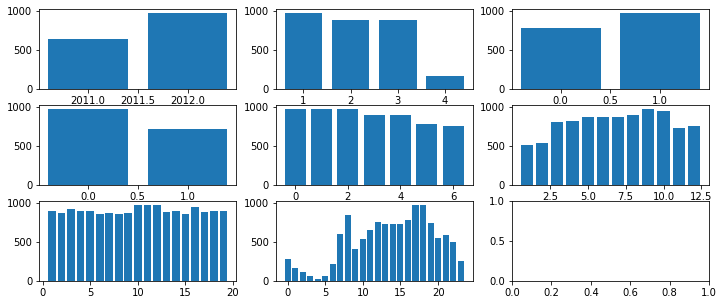

In [225]:
fig, axes = plt.subplots(nrows=3,ncols=3)
fig.set_size_inches(12,5)
axes[0][0].bar(train_df["year"], train_df["count"])
axes[0][1].bar(train_df["weather"], train_df["count"])
axes[0][2].bar(train_df["workingday"], train_df["count"])
axes[1][0].bar(train_df["holiday"], train_df["count"])
axes[1][1].bar(train_df["weekday"], train_df["count"])
axes[1][2].bar(train_df["month"], train_df["count"])
axes[2][0].bar(train_df["day"], train_df["count"])
axes[2][1].bar(train_df["hour"], train_df["count"])
plt.show()

In [226]:
series_data = train_df.groupby(["month"])["count"].mean()
series_data

month
1      90.366516
2     110.003330
3     148.169811
4     184.160616
5     219.459430
6     242.031798
7     235.325658
8     234.118421
9     233.805281
10    227.699232
11    193.677278
12    175.614035
Name: count, dtype: float64

In [227]:
series_data.index.tolist()

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

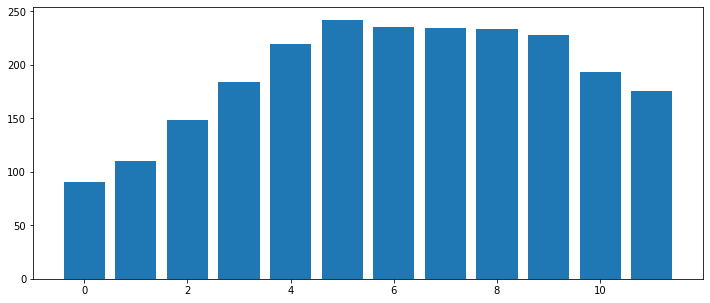

In [228]:
fig, ax = plt.subplots()
ax.bar(range(len(series_data)), series_data)
fig.set_size_inches(12,5)
plt.show()

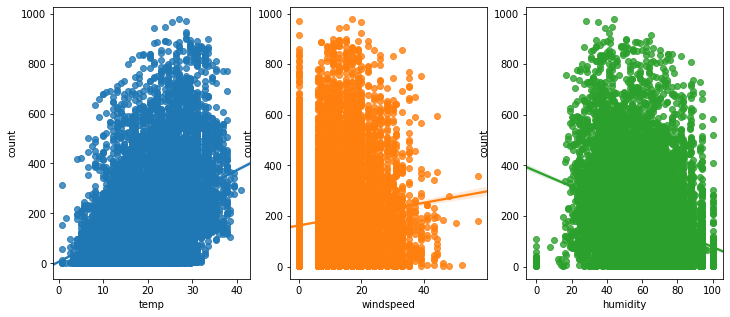

In [229]:
import seaborn as sn

fig,(ax1,ax2,ax3) = plt.subplots(ncols=3)
fig.set_size_inches(12,5)
sn.regplot(x="temp",y="count",data=train_df,ax=ax1)
sn.regplot(x="windspeed",y="count",data=train_df,ax=ax2)
sn.regplot(x="humidity",y="count",data=train_df,ax=ax3)
plt.show()

In [230]:
category_variable_list

['season',
 'weather',
 'workingday',
 'season_1',
 'season_2',
 'season_3',
 'season_4',
 'weather_1',
 'weather_2',
 'weather_3',
 'weather_4',
 'year',
 'month',
 'day',
 'hour',
 'weekday',
 'weekday_0',
 'weekday_1',
 'weekday_2',
 'weekday_3',
 'weekday_4',
 'weekday_5',
 'weekday_6']

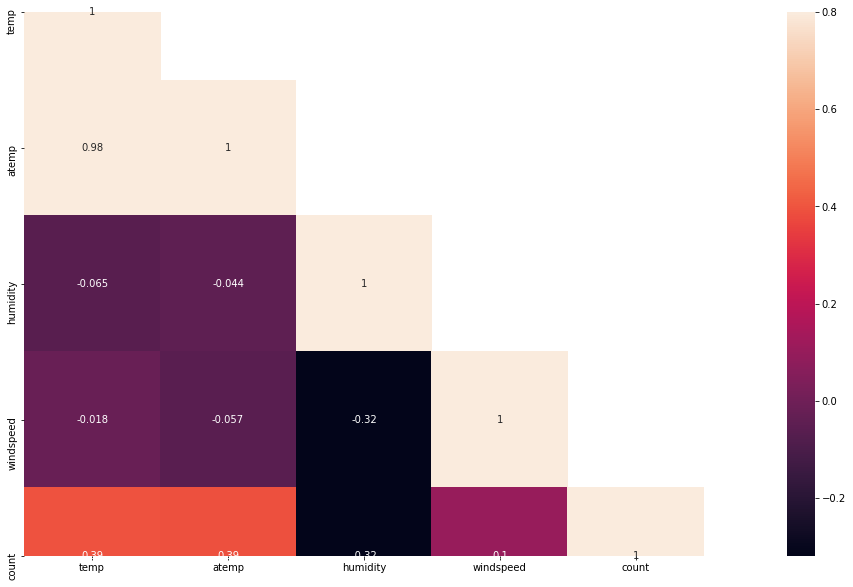

In [231]:
corrMatt = train_df[["temp","atemp","humidity","windspeed","count"]].corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)]=False
fig,ax= plt.subplots()
fig.set_size_inches(30,10)
sn.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True)
plt.show()

In [232]:
category_variable_list[:5]

['season', 'weather', 'workingday', 'season_1', 'season_2']

In [233]:
continuous_variable_list = ["temp","humidity","windspeed","atemp"]
continuous_variable_list

['temp', 'humidity', 'windspeed', 'atemp']

In [234]:
season_list = ["season_1","season_2","season_3","season_4"]
weather_list = ["weather_1","weather_2","weather_3","weather_4"]
weekday_list = ["weekday_0","weekday_1","weekday_2","weekday_3","weekday_4","weekday_5","weekday_6"]

In [235]:
category_variable_list=["season","holiday","workingday","weather","weekday","month","year","hour"]
category_variable_list

['season',
 'holiday',
 'workingday',
 'weather',
 'weekday',
 'month',
 'year',
 'hour']

In [236]:
all_variable_list = continuous_variable_list + category_variable_list
all_variable_list

['temp',
 'humidity',
 'windspeed',
 'atemp',
 'season',
 'holiday',
 'workingday',
 'weather',
 'weekday',
 'month',
 'year',
 'hour']

In [237]:
all_variable_list.append(season_list)
all_variable_list.append(weather_list)
all_variable_list.append(weekday_list)

In [238]:
all_variable_list

['temp',
 'humidity',
 'windspeed',
 'atemp',
 'season',
 'holiday',
 'workingday',
 'weather',
 'weekday',
 'month',
 'year',
 'hour',
 ['season_1', 'season_2', 'season_3', 'season_4'],
 ['weather_1', 'weather_2', 'weather_3', 'weather_4'],
 ['weekday_0',
  'weekday_1',
  'weekday_2',
  'weekday_3',
  'weekday_4',
  'weekday_5',
  'weekday_6']]

In [239]:
number_of_variables = len(all_variable_list)
number_of_variables

15

In [240]:
variable_combinations = []
import itertools
for L in range(14, number_of_variables+1):
    for subset in itertools.combinations(all_variable_list,L):
        temp=[]
        for variable in subset:
            if isinstance(variable,list):
                for value in variable:
                    temp.append(value)
            else: 
                temp.append(variable)
        variable_combinations.append(temp)

In [241]:
variable_combinations

[['temp',
  'humidity',
  'windspeed',
  'atemp',
  'season',
  'holiday',
  'workingday',
  'weather',
  'weekday',
  'month',
  'year',
  'hour',
  'season_1',
  'season_2',
  'season_3',
  'season_4',
  'weather_1',
  'weather_2',
  'weather_3',
  'weather_4'],
 ['temp',
  'humidity',
  'windspeed',
  'atemp',
  'season',
  'holiday',
  'workingday',
  'weather',
  'weekday',
  'month',
  'year',
  'hour',
  'season_1',
  'season_2',
  'season_3',
  'season_4',
  'weekday_0',
  'weekday_1',
  'weekday_2',
  'weekday_3',
  'weekday_4',
  'weekday_5',
  'weekday_6'],
 ['temp',
  'humidity',
  'windspeed',
  'atemp',
  'season',
  'holiday',
  'workingday',
  'weather',
  'weekday',
  'month',
  'year',
  'hour',
  'weather_1',
  'weather_2',
  'weather_3',
  'weather_4',
  'weekday_0',
  'weekday_1',
  'weekday_2',
  'weekday_3',
  'weekday_4',
  'weekday_5',
  'weekday_6'],
 ['temp',
  'humidity',
  'windspeed',
  'atemp',
  'season',
  'holiday',
  'workingday',
  'weather',
  'week

In [242]:
del pre_df["count"]

In [243]:
pre_df

,atemp,datetime,holiday,humidity,season,temp,weather,windspeed,workingday,season_1,...,day,hour,weekday,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,14.395,2011-01-01 00:00:00,0,81,1,9.84,1,0.0000,0,1,...,1,0,5,0,0,0,0,0,1,0
1,13.635,2011-01-01 01:00:00,0,80,1,9.02,1,0.0000,0,1,...,1,1,5,0,0,0,0,0,1,0
2,13.635,2011-01-01 02:00:00,0,80,1,9.02,1,0.0000,0,1,...,1,2,5,0,0,0,0,0,1,0
3,14.395,2011-01-01 03:00:00,0,75,1,9.84,1,0.0000,0,1,...,1,3,5,0,0,0,0,0,1,0
4,14.395,2011-01-01 04:00:00,0,75,1,9.84,1,0.0000,0,1,...,1,4,5,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,12.880,2012-12-31 19:00:00,0,60,1,10.66,2,11.0014,1,1,...,31,19,0,1,0,0,0,0,0,0
17375,12.880,2012-12-31 20:00:00,0,60,1,10.66,2,11.0014,1,1,...,31,20,0,1,0,0,0,0,0,0
17376,12.880,2012-12-31 21:00:00,0,60,1,10.66,1,11.0014,1,1,...,31,21,0,1,0,0,0,0,0,0
17377,13.635,2012-12-31 22:00:00,0,56,1,10.66,1,8.9981,1,1,...,31,22,0,1,0,0,0,0,0,0


In [244]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
import datetime

In [245]:
kf = KFold(n_splits=10)

y = train_df["count"].values
final_output = []
models = []

print(len(variable_combinations))
ts = datetime.datetime.now()
for i, combination in enumerate(variable_combinations):
    lr = LinearRegression(n_jobs=8)
    ridge = Ridge()
    lasso = Lasso()
    
    lr_result = []
    ridge_result = []
    lasso_result = []
    
    target_df = pre_df[combination]
    ALL = target_df.values
    std = StandardScaler()
    std.fit(ALL)
    ALL_scaled = std.transform(ALL)
    X = ALL_scaled[train_index]
    
    for train_data_index, test_data_index in kf.split(X):
        X_train = X[train_data_index]
        X_test = X[test_data_index]
        y_train = y[train_data_index]
        y_test = y[test_data_index]
        
        lr.fit(X_train, y_train)
        result = rmsle(y_test, lr.predict(X_test))
        lr_result.append(result)
        
        ridge.fit(X_train, y_train)
        result = rmsle(y_test, ridge.predict(X_test))
        ridge_result.append(result)
        
        lasso.fit(X_train, y_train)
        result = rmsle(y_test, lasso.predict(X_test))
        lasso_result.append(result)
        
    final_output.append([i,np.mean(lr_result),np.mean(ridge_result),np.mean(lasso_result)])
    models.append([lr,ridge,lasso])
    if i%100==0:
        tf = datetime.datetime.now()
        te = tf-ts
        print(i, te)
        ts = datetime.datetime.now()

16


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Pr

0 0:00:01.778245


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Pr

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Pr

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Pr

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Pr

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Pr

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Pr

In [246]:
labels=['combination','lr','ridge','lasso']

from pandas import DataFrame
result_df = DataFrame(final_output, columns=labels)
result_df

,combination,lr,ridge,lasso
0,0,1.337141,1.322300,1.303500
1,1,1.323850,1.323741,1.309643
2,2,1.344501,1.322538,1.309016
3,3,1.471335,1.461893,1.435222
4,4,1.327186,1.316650,1.305703
5,5,1.334825,1.319149,1.306904
6,6,1.343326,1.324751,1.306317
7,7,1.342845,1.324746,1.306317
8,8,1.344084,1.324752,1.306317
9,9,1.326624,1.324751,1.306225


In [247]:
result_df.min()

combination    0.000000
lr             1.320337
ridge          1.316650
lasso          1.303500
dtype: float64

In [248]:
result_df["lasso"].sort_values().head()

0     1.303500
14    1.304744
12    1.305013
4     1.305703
11    1.305956
Name: lasso, dtype: float64

In [249]:
target_df = pre_df[variable_combinations[0]]
ALL = target_df.values
std = StandardScaler()
std.fit(ALL)
ALL_scaled = std.transform(ALL)
X_submission_test = ALL_scaled[test_index]
X_submission_test

array([[-1.23077877, -0.34847267,  1.61850352, ..., -0.59500584,
        -0.29817742, -0.01313971],
       [-1.23077877, -0.34847267, -1.55388851, ..., -0.59500584,
        -0.29817742, -0.01313971],
       [-1.23077877, -0.34847267, -1.55388851, ..., -0.59500584,
        -0.29817742, -0.01313971],
       ...,
       [-1.23077877, -0.14113744, -0.21169121, ..., -0.59500584,
        -0.29817742, -0.01313971],
       [-1.23077877, -0.34847267, -0.45609864, ..., -0.59500584,
        -0.29817742, -0.01313971],
       [-1.23077877,  0.11803159, -0.45609864, ..., -0.59500584,
        -0.29817742, -0.01313971]])

In [250]:
models[0][2]

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [259]:
final_result = models[0][2].predict(X_submission_test)
final_result[final_result<0] = 0

In [260]:
final_result

array([  0.        ,   0.        ,   0.        , ..., 283.34765875,
       298.95158826, 290.11400255])

In [261]:
pre_df.iloc[test_index]["datetime"].head()

10886   2011-01-20 00:00:00
10887   2011-01-20 01:00:00
10888   2011-01-20 02:00:00
10889   2011-01-20 03:00:00
10890   2011-01-20 04:00:00
Name: datetime, dtype: datetime64[ns]

In [264]:
data = {"datetime":pre_df.iloc[test_index]["datetime"],"count":final_result}
df_submission = DataFrame(data, columns=["datetime","count"])
df_submission

,datetime,count
10886,2011-01-20 00:00:00,0.000000
10887,2011-01-20 01:00:00,0.000000
10888,2011-01-20 02:00:00,0.000000
10889,2011-01-20 03:00:00,0.000000
10890,2011-01-20 04:00:00,0.000000
...,...,...
17374,2012-12-31 19:00:00,274.131160
17375,2012-12-31 20:00:00,281.698812
17376,2012-12-31 21:00:00,283.347659
17377,2012-12-31 22:00:00,298.951588


In [265]:
df_submission.set_index("datetime").to_csv("submission_lasso_data.csv")